In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from PIL import Image
from torch import tensor
from brisque import BRISQUE
import lpips
import torchvision.transforms as transforms
import cpbd
from torchmetrics.image import VisualInformationFidelity
import torch
from transformers import AutoImageProcessor, AutoModel

In [232]:
sd_images_input = 'reduced_images_dataset'

sd_images_dataset = [file for file in os.listdir(sd_images_input)]
sd_images_dataset = ["./" + sd_images_input + "/" + x for x in sd_images_dataset]

sd_images_recon_input = 'reduced_images_recon'

sd_images_recon = [file for file in os.listdir(sd_images_recon_input)]
sd_images_recon = ["./" + sd_images_recon_input + "/" + x for x in sd_images_recon]

hific_low_images_input = 'reduced_images_dataset'
hific_low_images_output = 'hific_low_images_recon'

hific_low_images_dataset = [file for file in os.listdir(hific_low_images_input)]
hific_low_images_dataset = ["./" + hific_low_images_input + "/" + x for x in hific_low_images_dataset]

hific_low_images_recon = [file for file in os.listdir(hific_low_images_output)]
hific_low_images_recon = ["./" + hific_low_images_output + "/" + x for x in hific_low_images_recon]

taco_images_input = 'reduced_images_dataset'
taco_images_output = 'taco_images_recon'

taco_images_dataset = [file for file in os.listdir(taco_images_input)]
taco_images_dataset = ["./" + taco_images_input + "/" + x for x in taco_images_dataset]

taco_images_recon = [file for file in os.listdir(taco_images_output)]
taco_images_recon = ["./" + taco_images_output + "/" + x for x in taco_images_recon]

flux_images_input = 'reduced_images_dataset'
flux_images_output = 'flux_images_recon'

flux_images_dataset = [file for file in os.listdir(flux_images_input)]
flux_images_dataset = ["./" + flux_images_input + "/" + x for x in flux_images_dataset]

flux_images_recon = [file for file in os.listdir(flux_images_output)]
flux_images_recon = ["./" + flux_images_output + "/" + x for x in flux_images_recon]

In [73]:
print(len(sd_images_dataset))
print(len(sd_images_recon))

148
148


# VIF

In [ ]:
target = [np.array(cv2.imread("./target.png", cv2.IMREAD_GRAYSCALE)).astype(float)]
target = np.stack(target, axis=0)
target = np.expand_dims(target, axis=1).transpose(0, 1, 3, 2)
target = tensor(target)

pred = [np.array(cv2.imread("./pred.png", cv2.IMREAD_GRAYSCALE)).astype(float)]
pred = np.stack(pred, axis=0)
pred = np.expand_dims(pred, axis=1).transpose(0, 1, 3, 2)
pred = tensor(pred)

vif = VisualInformationFidelity()
print(vif(pred, target))

tensor(0.2406)


# PSNR

In [74]:
def calculate_psnr(img1, img2, max_value=255):
    """"Calculating peak signal-to-noise ratio (PSNR) between two images."""
    mse = np.mean((np.array(img1, dtype=np.float32) - np.array(img2, dtype=np.float32)) ** 2)
    if mse == 0:
        return 100
    return 20 * np.log10(max_value / (np.sqrt(mse)))


sd_psnrs = []
for i in range(len(sd_images_dataset)):
    img1 = cv2.imread(sd_images_dataset[i], cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(sd_images_recon[i], cv2.IMREAD_GRAYSCALE)
    sd_psnrs.append(calculate_psnr(img1, img2))

hific_low_psnrs = []
for i in range(len(hific_low_images_dataset)):
    img1 = cv2.imread(hific_low_images_dataset[i], cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(hific_low_images_recon[i], cv2.IMREAD_GRAYSCALE)
    hific_low_psnrs.append(calculate_psnr(img1, img2))

print("SD PSNR: ", np.mean(sd_psnrs))
print("HIFIC Low PSNR: ", np.mean(hific_low_psnrs))

SD PSNR:  18.948941031064837
HIFIC Low PSNR:  28.088142092858714


# BRISQUE

In [145]:
obj = BRISQUE(url=False)

# orig_brisque_scores = []
sd_brisque_scores = []
flux_brisque_scores = []
hific_low_brisque_scores = []
taco_brisque_scores = []

for i in range(len(sd_images_recon)):
    # orig = np.asarray(Image.open(sd_images_dataset[i]))
    sd_recon = np.asarray(Image.open(sd_images_recon[i]))
    flux_recon = np.asarray(Image.open(flux_images_recon[i]))
    hific_low_recon = np.asarray(Image.open(hific_low_images_recon[i]))
    taco_recon = np.asarray(Image.open(taco_images_recon[i]))
    # orig_score = obj.score(orig)
    sd_score = obj.score(sd_recon)
    flux_score = obj.score(flux_recon)
    hific_low_score = obj.score(hific_low_recon)
    taco_score = obj.score(taco_recon)
    # if (orig_score > 0):
    #     orig_brisque_scores.append(orig_score)
    if (sd_score > 0):
        sd_brisque_scores.append(sd_score)
    if (flux_score > 0):
        flux_brisque_scores.append(flux_score)
    if (hific_low_score > 0):
        hific_low_brisque_scores.append(hific_low_score)
    if (taco_score > 0):
        taco_brisque_scores.append(taco_score)

# print("ORIGINAL BRISQUE MEAN: ", np.mean(orig_brisque_scores))
print("SD BRISQUE MEAN: ", np.mean(sd_brisque_scores))
print("FLUX BRISQUE MEAN: ", np.mean(flux_brisque_scores))
print("HIFIC Low BRISQUE MEAN: ", np.mean(hific_low_brisque_scores))
print("TACO BRISQUE MEAN: ", np.mean(taco_brisque_scores))
print("")
# print("ORIGINAL BRISQUE MIN: ", min(orig_brisque_scores))
print("SD BRISQUE MIN: ", min(sd_brisque_scores))
print("FLUX BRISQUE MIN: ", min(flux_brisque_scores))
print("HIFIC Low BRISQUE MIN: ", min(hific_low_brisque_scores))
print("TACO BRISQUE MIN: ", min(taco_brisque_scores))
print("")
# print("ORIGINAL BRISQUE MAX: ", max(orig_brisque_scores))
print("SD BRISQUE MAX: ", max(sd_brisque_scores))
print("FLUX BRISQUE MAX: ", max(flux_brisque_scores))
print("HIFIC Low BRISQUE MAX: ", max(hific_low_brisque_scores))
print("TACO BRISQUE MAX: ", max(taco_brisque_scores))

SD BRISQUE MEAN:  23.357631252043014
FLUX BRISQUE MEAN:  24.109506045743334
HIFIC Low BRISQUE MEAN:  23.91067890605449
TACO BRISQUE MEAN:  29.89563233337736

SD BRISQUE MIN:  0.6612401649879018
FLUX BRISQUE MIN:  1.126940666333411
HIFIC Low BRISQUE MIN:  0.19866719068861016
TACO BRISQUE MIN:  0.9307442336068732

SD BRISQUE MAX:  71.81425619055764
FLUX BRISQUE MAX:  82.18761363132828
HIFIC Low BRISQUE MAX:  94.39581716031873
TACO BRISQUE MAX:  102.93005269182592


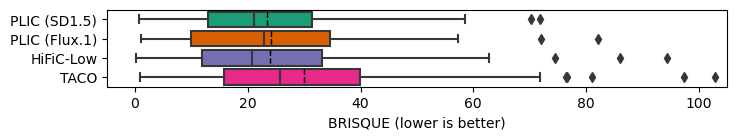

In [71]:
brisque_scores = sd_brisque_scores + flux_brisque_scores + hific_low_brisque_scores + taco_brisque_scores

brisque_technique_labels = ['PLIC (SD1.5)']*(len(sd_brisque_scores)) + ['PLIC (Flux.1)']*(len(flux_brisque_scores)) + ['HiFiC-Low']*(len(hific_low_brisque_scores)) + ['TACO']*(len(taco_brisque_scores))

custom_palette = {
    'PLIC (SD1.5)': '#1b9e77',      # hex color for sd (stable diffusion)
    'PLIC (Flux.1)': '#d95f02',    # hex color for flux
    # 'PLIC\n(SD\nTurbo)': '#377eb8', # hex color for sdturbo
    'HiFiC-Low': '#7570b3',      # hex color for hific low
    'TACO': '#e7298a'     # hex color for taco
}

technique_labels = pd.Categorical(brisque_technique_labels, categories=custom_palette.keys())

fig, axs = plt.subplots(1, 1, figsize=(8, 1), sharey=False)

sns.boxplot(ax=axs, y=technique_labels, x=brisque_scores, palette=custom_palette, saturation=1, showmeans=True, meanline=True, meanprops={'linestyle':'--', 'color':'k', 'linewidth':1.05})
# axs.set_title('Image Quality', fontsize=12, fontweight='bold')
axs.set_xlabel('BRISQUE (lower is better)',)
left, right = axs.get_xlim()
axs.set_xlim(left, 105)
plt.savefig("brisque_box.pdf", format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()

# CPBD

In [164]:
sd_cpbd_scores = []
flux_cpbd_scores = []
hific_low_cpbd_scores = []
taco_cpbd_scores = []

for i in range(len(sd_images_recon)):
    print(i)
    sd_recon = np.asarray(Image.open(sd_images_recon[i]).convert('L'))
    flux_recon = np.asarray(Image.open(flux_images_recon[i]).convert('L'))
    hific_low_recon = np.asarray(Image.open(hific_low_images_recon[i]).convert('L'))
    taco_recon = np.asarray(Image.open(taco_images_recon[i]).convert('L'))

    sd_score = cpbd.compute(sd_recon)
    flux_score = cpbd.compute(flux_recon)
    hific_low_score = cpbd.compute(hific_low_recon)
    taco_score = cpbd.compute(taco_recon)

    if (sd_score > 0):
        sd_cpbd_scores.append(sd_score)
    if (flux_score > 0):
        flux_cpbd_scores.append(flux_score)
    if (hific_low_score > 0):
        hific_low_cpbd_scores.append(hific_low_score)
    if (taco_score > 0):
        taco_cpbd_scores.append(taco_score)

print("SD CPBD MEAN: ", np.mean(sd_cpbd_scores))
print("FLUX CPBD MEAN: ", np.mean(flux_cpbd_scores))
print("HIFIC Low CPBD MEAN: ", np.mean(hific_low_cpbd_scores))
print("TACO CPBD MEAN: ", np.mean(taco_cpbd_scores))
print("")
print("SD CPBD MIN: ", min(sd_cpbd_scores))
print("FLUX CPBD MIN: ", min(flux_cpbd_scores))
print("HIFIC Low CPBD MIN: ", min(hific_low_cpbd_scores))
print("TACO CPBD MIN: ", min(taco_cpbd_scores))
print("")
print("SD CPBD MAX: ", max(sd_cpbd_scores))
print("FLUX CPBD MAX: ", max(flux_cpbd_scores))
print("HIFIC Low CPBD MAX: ", max(hific_low_cpbd_scores))
print("TACO CPBD MAX: ", max(taco_cpbd_scores))

# input_image = np.array(Image.open('pred.png').convert('L')).transpose(1, 0)
# cpbd.compute(input_image)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
SD CPBD MEAN:  0.6039088044848735
FLUX CPBD MEAN:  0.5822849221142419
HIFIC Low CPBD MEAN:  0.508987753851091
TACO CPBD MEAN:  0.584704363471361

SD CPBD MIN:  0.06758665652504618
FLUX CPBD MIN:  0.03444976076555024
HIFIC Low CPBD MIN:  0.09541076487252123
TACO CPBD MIN:  0.15299435028248587

SD CPBD MAX:  0.8605115567641062
FLUX CPBD MAX:  0.8938565116768356
HIFIC Low CPBD MAX:  0.8617588274483678
TACO CPBD MAX:  0.8819884235614572


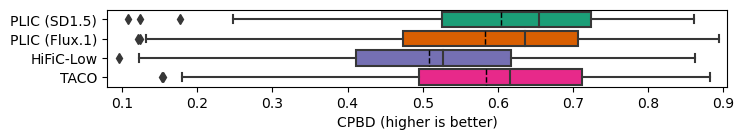

In [78]:
cpbd_scores = sd_cpbd_scores + flux_cpbd_scores + hific_low_cpbd_scores + taco_cpbd_scores

cpbd_technique_labels = ['PLIC (SD1.5)']*(len(sd_cpbd_scores)) + ['PLIC (Flux.1)']*(len(flux_cpbd_scores)) + ['HiFiC-Low']*(len(hific_low_cpbd_scores)) + ['TACO']*(len(taco_cpbd_scores))

custom_palette = {
    'PLIC (SD1.5)': '#1b9e77',      # hex color for sd (stable diffusion)
    'PLIC (Flux.1)': '#d95f02',    # hex color for flux
    # 'PLIC\n(SD\nTurbo)': '#377eb8', # hex color for sdturbo
    'HiFiC-Low': '#7570b3',      # hex color for hific low
    'TACO': '#e7298a'     # hex color for taco
}

technique_labels = pd.Categorical(cpbd_technique_labels, categories=custom_palette.keys())

fig, axs = plt.subplots(1, 1, figsize=(8, 1), sharey=False)

sns.boxplot(ax=axs, y=technique_labels, x=cpbd_scores, palette=custom_palette, saturation=1, showmeans=True, meanline=True, meanprops={'linestyle':'--', 'color':'k', 'linewidth':1.05})
# axs.set_title('Image Quality', fontsize=12, fontweight='bold')
axs.set_xlabel('CPBD (higher is better)')
left, right = axs.get_xlim()
axs.set_xlim(0.08, 0.905)
plt.savefig("cpbd_box.pdf", format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()

# LPIPS

In [185]:
def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize((256, 256)),  # Resize the image to a fixed size (optional)
        transforms.ToTensor(),         # Convert image to tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = transform(image).unsqueeze(0)  # Add batch dimension
    return image

lpips_model = lpips.LPIPS(net='squeeze')  # You can choose different networks: 'alex', 'vgg', 'squeeze'

sd_lpips_scores = []
flux_lpips_scores = []
hific_low_lpips_scores = []
taco_lpips_scores = []

for i in range(len(sd_images_recon)):
    print(i)
    
    sd_score = lpips_model(load_image(sd_images_dataset[i]), load_image(sd_images_recon[i])).item()
    flux_score = lpips_model(load_image(flux_images_dataset[i]), load_image(flux_images_recon[i])).item()
    hific_low_score = lpips_model(load_image(hific_low_images_dataset[i]), load_image(hific_low_images_recon[i])).item()
    taco_score = lpips_model(load_image(taco_images_dataset[i]), load_image(taco_images_recon[i])).item()

    if (sd_score > 0) and (sd_score <= 1):
        sd_lpips_scores.append(sd_score)
    if (flux_score > 0) and (flux_score <= 1):
        flux_lpips_scores.append(flux_score)
    if (hific_low_score > 0) and (hific_low_score <= 1):
        hific_low_lpips_scores.append(hific_low_score)
    if (taco_score > 0) and (taco_score <= 1):
        taco_lpips_scores.append(taco_score)

Setting up [LPIPS] perceptual loss: trunk [squeeze], v[0.1], spatial [off]


c:\Users\Shayan\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Shayan\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_1_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_1_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/squeezenet1_1-b8a52dc0.pth" to C:\Users\Shayan/.cache\torch\hub\checkpoints\squeezenet1_1-b8a52dc0.pth
100%|██████████| 4.73M/4.73M [00:12<00:00, 402kB/s]


Loading model from: c:\Users\Shayan\anaconda3\Lib\site-packages\lpips\weights\v0.1\squeeze.pth
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147


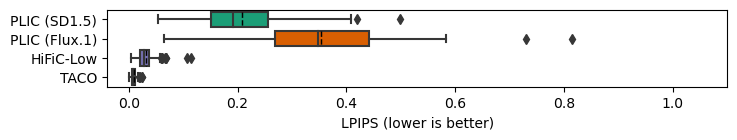

In [53]:
lpips_scores = sd_lpips_scores + flux_lpips_scores + hific_low_lpips_scores + taco_lpips_scores

lpips_technique_labels = ['PLIC (SD1.5)']*(len(sd_lpips_scores)) + ['PLIC (Flux.1)']*(len(flux_lpips_scores)) + ['HiFiC-Low']*(len(hific_low_lpips_scores)) + ['TACO']*(len(taco_lpips_scores))

custom_palette = {
    'PLIC (SD1.5)': '#1b9e77',      # hex color for sd (stable diffusion)
    'PLIC (Flux.1)': '#d95f02',    # hex color for flux
    # 'PLIC\n(SD\nTurbo)': '#377eb8', # hex color for sdturbo
    'HiFiC-Low': '#7570b3',      # hex color for hific low
    'TACO': '#e7298a'     # hex color for taco
}

technique_labels = pd.Categorical(lpips_technique_labels, categories=custom_palette.keys())

fig, axs = plt.subplots(1, 1, figsize=(8, 1), sharey=False)

sns.boxplot(ax=axs, y=technique_labels, x=lpips_scores, palette=custom_palette, saturation=1, showmeans=True, meanline=True, meanprops={'linestyle':'--', 'color':'k', 'linewidth':1.05})
# axs.set_title('Perceptual Similarity', fontsize=12, fontweight='bold')
axs.set_xlabel('LPIPS (lower is better)')
left, right = axs.get_xlim()
axs.set_xlim(left, 1.1)
plt.savefig("lpips_box.pdf", format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()

# DINOv2

In [194]:
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")

# Load DINOv2 model and processor
processor_dino = AutoImageProcessor.from_pretrained('facebook/dinov2-base')
model_dino = AutoModel.from_pretrained('facebook/dinov2-base').to(device)

# Function to extract DINOv2 features
def extract_features_dino(image):
    with torch.no_grad():
        inputs = processor_dino(images=image, return_tensors="pt").to(device)
        outputs = model_dino(**inputs)
        image_features = outputs.last_hidden_state
        return image_features.mean(dim=1)
    
# Function to calculate cosine similarity between two feature vectors
def cosine_similarity2(vector1, vector2):
    vector1 = vector1 / vector1.norm(dim=-1, keepdim=True)
    vector2 = vector2 / vector2.norm(dim=-1, keepdim=True)
    return torch.sum(vector1 * vector2, dim=-1).item()

sd_dino_scores = []
flux_dino_scores = []
hific_low_dino_scores = []
taco_dino_scores = []

for i in range(len(sd_images_dataset)):
    print(i)
    
    dino_features1 = extract_features_dino((Image.open(sd_images_dataset[i]).convert('RGB')).resize((224, 224))).to(device)
    dino_features2 = extract_features_dino((Image.open(sd_images_recon[i]).convert('RGB')).resize((224, 224))).to(device)
    dino_similarity = cosine_similarity2(dino_features1, dino_features2)
    sd_dino_scores.append(dino_similarity)

    dino_features1 = extract_features_dino((Image.open(flux_images_dataset[i]).convert('RGB')).resize((224, 224))).to(device)
    dino_features2 = extract_features_dino((Image.open(flux_images_recon[i]).convert('RGB')).resize((224, 224))).to(device)
    dino_similarity = cosine_similarity2(dino_features1, dino_features2)
    flux_dino_scores.append(dino_similarity)

    dino_features1 = extract_features_dino((Image.open(hific_low_images_dataset[i]).convert('RGB')).resize((224, 224))).to(device)
    dino_features2 = extract_features_dino((Image.open(hific_low_images_recon[i]).convert('RGB')).resize((224, 224))).to(device)
    dino_similarity = cosine_similarity2(dino_features1, dino_features2)
    hific_low_dino_scores.append(dino_similarity)

    dino_features1 = extract_features_dino((Image.open(taco_images_dataset[i]).convert('RGB')).resize((224, 224))).to(device)
    dino_features2 = extract_features_dino((Image.open(taco_images_recon[i]).convert('RGB')).resize((224, 224))).to(device)
    dino_similarity = cosine_similarity2(dino_features1, dino_features2)
    taco_dino_scores.append(dino_similarity)

c:\Users\Shayan\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147


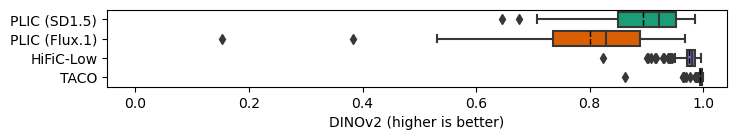

In [50]:
dino_scores = sd_dino_scores + flux_dino_scores + hific_low_dino_scores + taco_dino_scores

dino_technique_labels = ['PLIC (SD1.5)']*(len(sd_dino_scores)) + ['PLIC (Flux.1)']*(len(flux_dino_scores)) + ['HiFiC-Low']*(len(hific_low_dino_scores)) + ['TACO']*(len(taco_dino_scores))

custom_palette = {
    'PLIC (SD1.5)': '#1b9e77',      # hex color for sd (stable diffusion)
    'PLIC (Flux.1)': '#d95f02',    # hex color for flux
    # 'PLIC\n(SD\nTurbo)': '#377eb8', # hex color for sdturbo
    'HiFiC-Low': '#7570b3',      # hex color for hific low
    'TACO': '#e7298a'     # hex color for taco
}

technique_labels = pd.Categorical(dino_technique_labels, categories=custom_palette.keys())

fig, axs = plt.subplots(1, 1, figsize=(8, 1), sharey=False)

sns.boxplot(ax=axs, y=technique_labels, x=dino_scores, palette=custom_palette, saturation=1, showmeans=True, meanline=True, meanprops={'linestyle':'--', 'color':'k', 'linewidth':1.05})
# axs.set_title('Perceptual Similarity', fontsize=12, fontweight='bold')
axs.set_xlabel('DINOv2 (higher is better)')
left, right = axs.get_xlim()
axs.set_xlim(-0.05, right)
plt.savefig("dinov2_box.pdf", format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()

# bpp

In [2]:
data = pd.read_csv('FINAL_comparisons.csv')

sd_bpp = list(data['sd_bpp'])
flux_bpp = list(data['flux_bpp'])
hific_low_bpp = list(data['hific_low_bpp'])
taco_bpp = list(data['taco_bpp'])

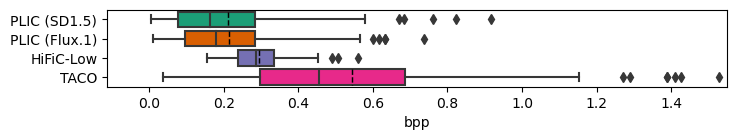

In [58]:
bpp_scores = sd_bpp + flux_bpp + hific_low_bpp + taco_bpp

bpp_technique_labels = ['PLIC (SD1.5)']*(len(sd_bpp)) + ['PLIC (Flux.1)']*(len(flux_bpp)) + ['HiFiC-Low']*(len(hific_low_bpp)) + ['TACO']*(len(taco_bpp))

custom_palette = {
    'PLIC (SD1.5)': '#1b9e77',      # hex color for sd (stable diffusion)
    'PLIC (Flux.1)': '#d95f02',    # hex color for flux
    # 'PLIC\n(SD\nTurbo)': '#377eb8', # hex color for sdturbo
    'HiFiC-Low': '#7570b3',      # hex color for hific low
    'TACO': '#e7298a'     # hex color for taco
}

technique_labels = pd.Categorical(bpp_technique_labels, categories=custom_palette.keys())

fig, axs = plt.subplots(1, 1, figsize=(8, 1), sharey=False)

sns.boxplot(ax=axs, y=technique_labels, x=bpp_scores, palette=custom_palette, saturation=1, showmeans=True, meanline=True, meanprops={'linestyle':'--', 'color':'k', 'linewidth':1.05})
# axs.set_title('Compression', fontsize=12, fontweight='bold')
axs.set_xlabel('bpp')
left, right = axs.get_xlim()
axs.set_xlim(left, 1.55)
plt.savefig("bpp_box.pdf", format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()

# time

In [25]:
data = pd.read_csv('FINAL_comparisons.csv')

sd_times = list(data['sd_generation_times'])
flux_times = list(data['flux_generation_times'])
hific_low_times = list(data['hific_low_generation_times'])
taco_times = list(data['taco_generation_times'])

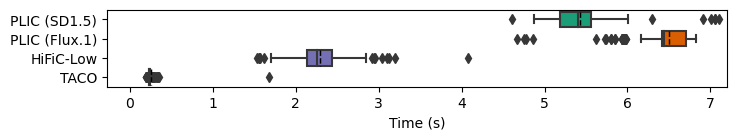

In [59]:
times_scores = sd_times + flux_times + hific_low_times + taco_times

times_technique_labels = ['PLIC (SD1.5)']*(len(sd_times)) + ['PLIC (Flux.1)']*(len(flux_times)) + ['HiFiC-Low']*(len(hific_low_times)) + ['TACO']*(len(taco_times))

custom_palette = {
    'PLIC (SD1.5)': '#1b9e77',      # hex color for sd (stable diffusion)
    'PLIC (Flux.1)': '#d95f02',    # hex color for flux
    # 'PLIC\n(SD\nTurbo)': '#377eb8', # hex color for sdturbo
    'HiFiC-Low': '#7570b3',      # hex color for hific low
    'TACO': '#e7298a'     # hex color for taco
}

technique_labels = pd.Categorical(times_technique_labels, categories=custom_palette.keys())

fig, axs = plt.subplots(1, 1, figsize=(8, 1), sharey=False)

sns.boxplot(ax=axs, y=technique_labels, x=times_scores, palette=custom_palette, saturation=1, showmeans=True, meanline=True, meanprops={'linestyle':'--', 'color':'k', 'linewidth':1.05})
# axs.set_title('Generation / Encoding-Decoding Times', fontsize=12, fontweight='bold')
axs.set_xlabel('Time (s)')
left, right = axs.get_xlim()
axs.set_xlim(left, 7.2)
plt.savefig("time_box.pdf", format="pdf", bbox_inches="tight", pad_inches = 0)
plt.show()

# saving to .csv

In [227]:
print(len(sd_cpbd_scores))
print(len(flux_cpbd_scores))
print(len(hific_low_cpbd_scores))
print(len(taco_cpbd_scores))

148
148
148
148


In [229]:
final_part1 = pd.DataFrame({
    'sd_lpips_scores': sd_lpips_scores,
    'flux_lpips_scores': flux_lpips_scores,
    'hific_low_lpips_scores': hific_low_lpips_scores,
    'taco_lpips_scores': taco_lpips_scores,
    'sd_dino_scores': sd_dino_scores,
    'flux_dino_scores': flux_dino_scores,
    'hific_low_dino_scores': hific_low_dino_scores,
    'taco_dino_scores': taco_dino_scores,
    'sd_bpp': sd_bpp,
    'flux_bpp': flux_bpp,
    'hific_low_bpp': hific_low_bpp,
    'taco_bpp': taco_bpp,
    'sd_times': sd_times,
    'flux_times': flux_times,
    'hific_low_times': hific_low_times,
    'taco_times': taco_times,
    'sd_cpbd_scores': sd_cpbd_scores,
    'flux_cpbd_scores': flux_cpbd_scores,
    'hific_low_cpbd_scores': hific_low_cpbd_scores,
    'taco_cpbd_scores': taco_cpbd_scores
})

final_part2 = pd.DataFrame({
    'sd_brisque_scores': sd_brisque_scores
})

final_part3 = pd.DataFrame({
    'flux_brisque_scores': flux_brisque_scores
})

final_part4 = pd.DataFrame({
    'hific_low_brisque_scores': hific_low_brisque_scores
})

final_part5 = pd.DataFrame({
    'taco_brisque_scores': taco_brisque_scores
})

In [230]:
df_final = [final_part1, final_part2, final_part3, final_part4, final_part5]
df_final = pd.concat(df_final, axis=1)

In [231]:
df_final.to_csv('ICCV_experiments_data.csv', index=False)

# reading

In [27]:
read_data = pd.read_csv('ICCV_experiments_data.csv')

In [33]:
sd_lpips_scores = list(read_data['sd_lpips_scores'])
flux_lpips_scores = list(read_data['flux_lpips_scores'])
hific_low_lpips_scores = list(read_data['hific_low_lpips_scores'])
taco_lpips_scores = list(read_data['taco_lpips_scores'])

In [43]:
sd_dino_scores = list(read_data['sd_dino_scores'])
flux_dino_scores = list(read_data['flux_dino_scores'])
hific_low_dino_scores = list(read_data['hific_low_dino_scores'])
taco_dino_scores = list(read_data['taco_dino_scores'])

In [60]:
sd_brisque_scores = list(read_data['sd_brisque_scores'])
flux_brisque_scores = list(read_data['flux_brisque_scores'])
hific_low_brisque_scores = list(read_data['hific_low_brisque_scores'])
taco_brisque_scores = list(read_data['taco_brisque_scores'])

In [72]:
sd_cpbd_scores = list(read_data['sd_cpbd_scores'])
flux_cpbd_scores = list(read_data['flux_cpbd_scores'])
hific_low_cpbd_scores = list(read_data['hific_low_cpbd_scores'])
taco_cpbd_scores = list(read_data['taco_cpbd_scores'])

# EXTRA

In [278]:
print(np.mean(sd_cpbd_scores))
print(np.mean(flux_cpbd_scores))
print(np.mean(hific_low_cpbd_scores))
print(np.mean(taco_cpbd_scores))

0.6039088044848735
0.5822849221142419
0.508987753851091
0.584704363471361
